In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
Advertising = pd.read_csv("../ISLP_labs/Advertising.csv", index_col=0)
Advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# Split in Input- und Outputvariable
X = Advertising[['TV']]
y = Advertising['Sales']

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training der Modelle
lr_model = LinearRegression().fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print(f"Intercept: {lr_model.intercept_}")
print(f"Coefficient for TV: {lr_model.coef_[0]}")

mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")

Intercept: 7.091089458846089
Coefficient for TV: 0.047476037528817294
Test Mean Squared Error: 10.6483145346814


Grad 1: MSE = 10.6241
Grad 2: MSE = 10.4793
Grad 3: MSE = 10.5322
Grad 4: MSE = 10.5844
Grad 5: MSE = 10.4910
Grad 6: MSE = 10.5522
Grad 7: MSE = 10.7337
Grad 8: MSE = 11.0167
Grad 9: MSE = 11.3141
Grad 10: MSE = 11.9179
Grad 11: MSE = 12.2360
Grad 12: MSE = 12.5444


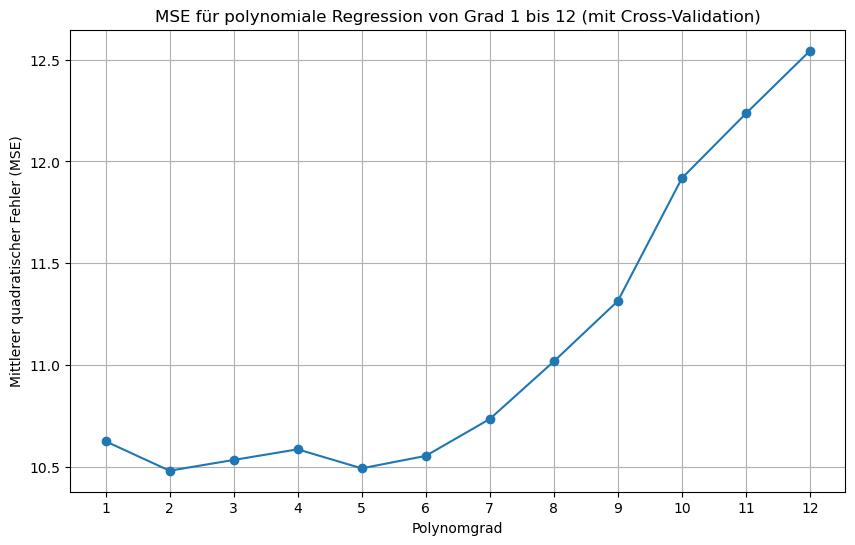

In [5]:
# Unabhängige Variablen (TV) und abhängige Variable (Sales)
X = Advertising[['TV']]
y = Advertising['Sales']

# Anzahl der Folds für die Kreuzvalidierung
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# MSEs für jedes Polynommodell von Grad 1 bis 12
mse_list = []

# Polynomiale Regression für jeden Grad 1 bis 12 durchführen
for degree in range(1, 13):
    
    # Pipeline: Zuerst polynomiale Features erzeugen, dann lineare Regression anwenden
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Cross-Validation anwenden und mittleren Fehler (MSE) berechnen
    mse = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf).mean()
    
    # MSE zum Plot hinzufügen
    mse_list.append(mse)
    print(f'Grad {degree}: MSE = {mse:.4f}')

# MSEs für verschiedene Grade plotten
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), mse_list, marker='o')
plt.title('MSE für polynomiale Regression von Grad 1 bis 12 (mit Cross-Validation)')
plt.xlabel('Polynomgrad')
plt.ylabel('Mittlerer quadratischer Fehler (MSE)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


## Hochdimensionale Daten

In [6]:
# Erstellen eines DataFrames mit 100 Zeilen und 500 Spalten von normalverteilten Zufallszahlen
rows = 100
cols = 501 # 500 Input Variablen und eine Output Variable
mean = 0
std = 1

# Generieren der Zufallszahlen
random_data = np.random.normal(loc=mean, scale=std, size=(rows, cols))

# Erstellen eines DataFrames
df = pd.DataFrame(random_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-0.526683,-1.082337,1.126311,-0.918901,0.656538,0.203602,-1.080714,-0.160824,0.605885,1.256406,...,-1.123169,-0.626057,0.194567,1.057534,0.163210,-0.548651,0.521774,2.204066,-0.012683,0.952385
1,-0.660239,-1.235007,-1.688075,0.122566,1.077102,0.170204,0.425880,-0.540286,-2.078048,1.935063,...,-0.281827,-0.623104,2.320808,0.570621,-0.387972,-0.261698,-0.622793,-0.815329,-0.200636,0.385790
2,-0.135410,0.768362,-0.038953,-0.621882,2.038761,-0.829073,-0.147249,0.875236,-0.224358,0.513588,...,-0.830960,-1.468821,1.302500,1.404036,0.730171,-0.341974,-0.273998,-0.241410,0.065488,-0.266717
3,-1.552742,-1.059022,-0.741732,-0.248150,-0.143258,0.296113,0.773206,0.419561,-1.198514,0.161247,...,0.365781,-0.384104,0.084410,0.036923,0.751911,2.776314,1.180271,0.352236,-0.219675,-1.543234
4,-1.183655,-0.417554,0.645756,0.922564,-0.787359,0.188287,-1.227789,-0.279066,-0.640982,-0.025712,...,0.063385,0.789405,-0.069372,-0.704818,0.374023,-1.596407,-0.739275,1.172313,-0.937374,0.607115


In [8]:
X = df.iloc[:, :500]
y = df.iloc[:,-1]

# Trainings- und Testsplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelltraining
lr_model = LinearRegression().fit(X_train, y_train)
y_pred_test = lr_model.predict(X_test)
y_pred_train = lr_model.predict(X_train)

# MSE
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Test Mean Squared Error: {mse_test}")
print(f"Train Mean Squared Error: {mse_train}")

Test Mean Squared Error: 1.2558151999051597
Train Mean Squared Error: 5.47690860641337e-30
